## Projection of vector v onto a line y=cx


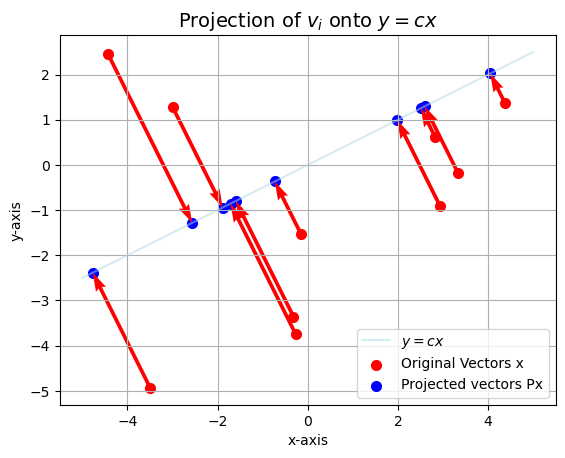

In [60]:
import numpy as np
import matplotlib.pyplot as plt
from ipywidgets import interact, FloatSlider, widgets

# Define the grid for x and y
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
c = 0.5
line = c*x

n = 10
n_dim = 2
V = np.random.random(size=(n_dim, n)) * 10 -5
P = 1/(c**2+1) *np.array([[1, c],
                          [c, c**2]])
Y = P @ V
fig, ax = plt.subplots()

# Plot the plane
ax.plot(x, line, color='lightblue', alpha=0.5, label=r"$y=cx$")
ax.scatter(*V, color="red", linewidth=2, label=f"Original Vectors x")
ax.scatter(*Y, color="blue", linewidth=2, label=f"Projected vectors Px")

ax.quiver(*V, *(Y-V), angles='xy', scale_units='xy', scale=1, color='red')

# Set labels and title
ax.set_title(r"Projection of $v_i$ onto $y=cx$", fontsize=14)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")

# Set viewing angle
ax.axis('equal')
ax.grid(True)

ax.legend()
plt.show()


https://en.wikipedia.org/wiki/Projection_matrix

ax+by+cz = 0
n = (a,b,c)

1





## projection onto the plane x+y+z=0


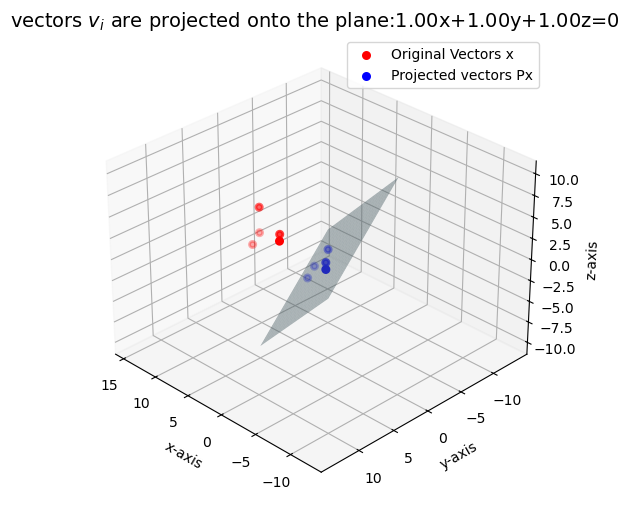

In [36]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, widgets

# Define the grid for x and y
x = np.linspace(-5, 5, 50)
y = np.linspace(-5, 5, 50)
x, y = np.meshgrid(x, y)

n = 5
n_dim = 3
V = np.random.randint(1, 8, size=(n_dim, n))
P = np.eye(n_dim) - np.ones((n_dim, n_dim))/ n_dim
Y = P @ V

# Define the plane ax +by +cz=0
a,b,c=1,1,1
z = (-a*x - b*y)/c
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

# Plot the plane
colors = [np.random.rand(3,) for _ in range(n)]  # Random RGB colors
ax.plot_surface(x, y, z, color='lightblue', alpha=0.5, edgecolor='none')
ax.scatter(*V, color="red", linewidth=2, label=f"Original Vectors x")
ax.scatter(*Y, color="blue", linewidth=2, label=f"Projected vectors Px")

# Set labels and title
ax.set_title(f"vectors $v_i$ are projected onto the plane:{a:.2f}x+{b:.2f}y+{c:.2f}z=0", fontsize=14)
ax.set_xlabel("x-axis")
ax.set_ylabel("y-axis")
ax.set_zlabel("z-axis")

# Set viewing angle
ax.view_init(elev=30, azim=135)
ax.axis('equal')

ax.legend()
plt.show()

## Projection of vecotrs onto a plane

$$
P =  A(A^T A)^{-1} A^T 
$$


In [103]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from ipywidgets import interact, FloatSlider, widgets

# Define the grid for x and y
x = np.linspace(-10, 10, 50)
y = np.linspace(-10, 10, 50)
x, y = np.meshgrid(x, y)

def plot_3d(angle_x, angle_y, a=1, b=1, c=-3):
    n = 5
    n_dim = 3
    V = np.random.random(size=(n_dim, n)) * 10*2 - 10 # random vectors
    a1 = np.array([1, 0, -a/c])
    a1 = a1/(a1**2).sum()
    a2 = np.array([0, 1, -b/c])
    a2 = a2/(a2**2).sum()
    A = np.array([a1,a2]).T
    P = A@np.linalg.inv((A.T@A))@A.T # Projection matrix
    Y = P @ V # project onto the plane
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')


    # Define the plane ax +by +cz=0
    z = (-a*x - b*y)/c # assuming c is not 0
    
    # Plot the plane
    ax.plot_surface(x, y, z, color='lightblue', alpha=0.5, edgecolor='none')
    ax.scatter(*V, color="red", label=f"Original Vectors x")
    ax.scatter(*Y, color="blue", label=f"Projected vectors Px")
    
    # Set labels and title
    ax.set_title(f"Original v and reflected vector Rv w.r.t the plane:{a:.2f}x+{b:.2f}y+{c:.2f}z=0", fontsize=14)
    ax.set_xlabel("x-axis")
    ax.set_ylabel("y-axis")
    ax.set_zlabel("z-axis")


    # Set viewing angle
    ax.view_init(elev=angle_x, azim=angle_y)
    ax.axis('equal')
    
    ax.legend()
    plt.show()

# Create sliders for the various parameters
elev_angle_slider = FloatSlider(value=30, min=0, max=90, step=5, description='Elev Angle')
azim_angle_slider = FloatSlider(value=100, min=0, max=360, step=10, description='Azim Angle')

v1_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v1')
v2_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v2')
v3_slider = FloatSlider(value=5, min=-10, max=10, step=0.1, description='v3')

a_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='a')
b_slider = FloatSlider(value=1, min=-5, max=5, step=0.1, description='b')
c_slider = FloatSlider(value=-3, min=-5, max=5, step=0.1, description='c')

# Arrange the sliders in the desired layout using HBox and VBox
sliders_layout = widgets.VBox([
    widgets.HBox([elev_angle_slider, azim_angle_slider]),
    widgets.HBox([a_slider, b_slider, c_slider])
])

# Create the reset function
def reset_parameters(b):
    # Reset all sliders to their default values
    elev_angle_slider.value = 30
    azim_angle_slider.value = 100
    a_slider.value = 1
    b_slider.value = 1
    c_slider.value = -3

# Create the reset button
reset_button = widgets.Button(description="Reset")

# Link the reset function to the button's click event
reset_button.on_click(reset_parameters)

# Layout with sliders and reset button
ui = widgets.VBox([
    sliders_layout,  
    reset_button  
])

# Use interact to call the plot function with the sliders
interact(
    plot_3d,
    angle_x=elev_angle_slider,
    angle_y=azim_angle_slider,
    a=a_slider,
    b=b_slider,
    c=c_slider
)

# Display the UI
display(ui)


interactive(children=(FloatSlider(value=30.0, description='Elev Angle', max=90.0, step=5.0), FloatSlider(value…